In [29]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import interpolate
import math
from scipy import signal
from numba import jit
%run StreamClass.ipynb
%run KalmanFilter.ipynb

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


## Plot each variable on a graph

In [39]:
data = Data_Stream("uni.csv", load_truth=True)
print(data.acc_DRC.shape)
# data.plot()

Parsed File
Freq. of Acceleration 1583.554443181799
Freq. of Lin. Acceleration 669.8833983859098
Freq. of Gyroscope 1585.3892195648934
Loaded Ground Truth
Interpolated Samples
Rotated Acceleration
Integrated Acceleration
(101740, 4)


## Kalman Filter Implementation

In [40]:
# %lprun -f compute_kalman(data)
# compute_kalman(data, reverse=True)

compute_kalman(data)
compute_kalman(data, reverse=True)
# %lprun -T lprof0 -f compute_kalman compute_kalman(data)
# %cat lprof0


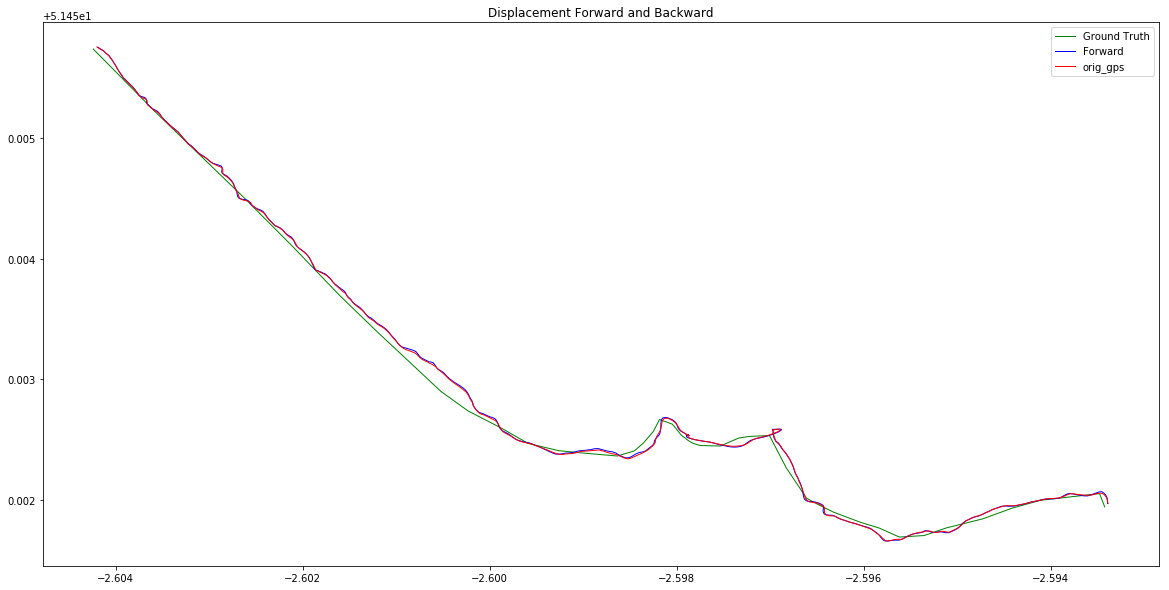

In [41]:
plt.figure(figsize=(20, 10))
ax=plt.subplot(111)
plt.plot(data.ground_truth.latlngs[:, 1], data.ground_truth.latlngs[:, 2], 'g-', lw=1, label='Ground Truth')
plt.plot(data.kal_latlng[:, 1], data.kal_latlng[:, 2], 'b-', lw=1, label='Forward')
# plt.plot(data.kal_latlng_reverse[:, 1], data.kal_latlng_reverse[:, 2], 'c-', lw=1, label='Backward')
plt.plot(data.gps_latlng[:, 1], data.gps_latlng[:, 2], 'r-', lw=1, label='orig_gps')
plt.title("Displacement Forward and Backward") 
ax.legend()

Plot Kalman Filter output against original Sensor Input

## Plotting Overlay on Google Maps
https://www.geeksforgeeks.org/python-plotting-google-map-using-gmplot-package/

https://github.com/pbugnion/gmaps

https://jupyter-gmaps.readthedocs.io/en/latest/

In [42]:
import gmaps
import gmaps.datasets

f = open('apikey.txt')
a = f.readline()

gmaps.configure(api_key=a) # Your Google API key

f_layout = {'width': '900px','height': '800px','border': '1px solid black', 'padding': '1px'}
fig = gmaps.figure(layout = f_layout, center=(data.kal_latlng[0, 2], 
                                              data.kal_latlng[0, 1]), zoom_level=18, map_type='HYBRID')
lines = []

locations_kal = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.kal_latlng])
locations_kal.gradient = [(0, 0, 0, 0.0), (0, 0, 255, 1), (0, 0, 128, 1)]
locations_kal.max_intensity = 1
locations_kal.point_radius = 5
print("Kalman Heatmap Layer")

locations_kal_rev = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.kal_latlng_reverse])
locations_kal_rev.gradient = [(0, 0, 0, 0.0), (0, 255, 255, 1), (0, 128, 128, 1)]
locations_kal_rev.max_intensity = 1
locations_kal_rev.point_radius = 5
print("Kalman Reverse Heatmap Layer")


locations_gps = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.gps_latlng])
locations_gps.gradient = [(0, 0, 0, 0.0), (255, 0, 0, 1), (128, 0, 0 , 1)]
locations_gps.max_intensity = 1
locations_gps.point_radius = 5
print("GPS Heatmap Layer")


locations_gt = gmaps.heatmap_layer([(i[0, 2], i[0, 1]) for i in data.ground_truth.latlngs])
locations_gt.gradient = [(0, 0, 0, 0.0), (0, 255, 0, 1), (0, 128, 0 , 1)]
locations_gt.max_intensity = 1
locations_gt.point_radius = 5
print("Ground Truth Heatmap Layer")

Kalman Heatmap Layer
Kalman Reverse Heatmap Layer
GPS Heatmap Layer
Ground Truth Heatmap Layer


In [43]:
fig.add_layer(locations_kal_rev)
fig.add_layer(locations_kal)
fig.add_layer(locations_gps)
fig.add_layer(locations_gt)
fig

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='900px'))